In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colorbar import ColorbarBase

## Problem 1

In [3]:
data = {
    "US Population": [16, 7, 10, 10, 10, 32, 15], 
    "Our Customers": [9, 10, 15, 18, 17, 20, 11]
}
distn_data = pd.DataFrame(data)
distn_data.head()

,US Population,Our Customers
0,16,9
1,7,10
2,10,15
3,10,18
4,10,17


In [4]:
def bars(ax, df, col, highlight, x_coord, title): 
    arr = df[col].values
    cum_sum = sum(arr)
    n = 7
    
    start = highlight[0]
    end = highlight[len(highlight) - 1]
    start_val = 0
    end_val = 0
    highlight_sum = 0
    highlight_y_coord = 0

    for i in np.arange(len(arr)):
        val = arr[len(arr) - i - 1]
        if n in highlight: 
            highlight_sum += val
            if n == end: 
                end_val = cum_sum
            elif n == start: 
                start_val = cum_sum - val
            elif n == int((end + start) / 2): 
                highlight_y_coord = cum_sum - val / 2
            col_bar = "mediumblue"
            col_text = "mediumblue"
            col = "white"
        else: 
            col_bar = "silver"
            col_text = "grey"
            col = "black"
        ax.bar(x_coord, cum_sum, width = 0.9, facecolor = col_bar, edgecolor = "white")    
        if title: 
            ax.text(-.33, cum_sum - val / 2, "Segment " + str(n), horizontalalignment = 'left', 
                    verticalalignment = 'center', fontsize = 12, color = col_text, fontweight = "bold")
            
        ax.text(x_coord, cum_sum - val / 2, str(val) + "%", horizontalalignment = 'center', verticalalignment = 'center', 
                   color = col, fontsize = 12)
        cum_sum -= val
        n -= 1
    
    ax.plot([x_coord + 0.5] * 2, [start_val, end_val], color = "mediumblue")
    ax.text(x_coord + 0.55, highlight_y_coord, str(highlight_sum) + "%", color = "mediumblue", horizontalalignment = "left", 
            verticalalignment = 'center', fontsize = 18, fontweight = "bold")

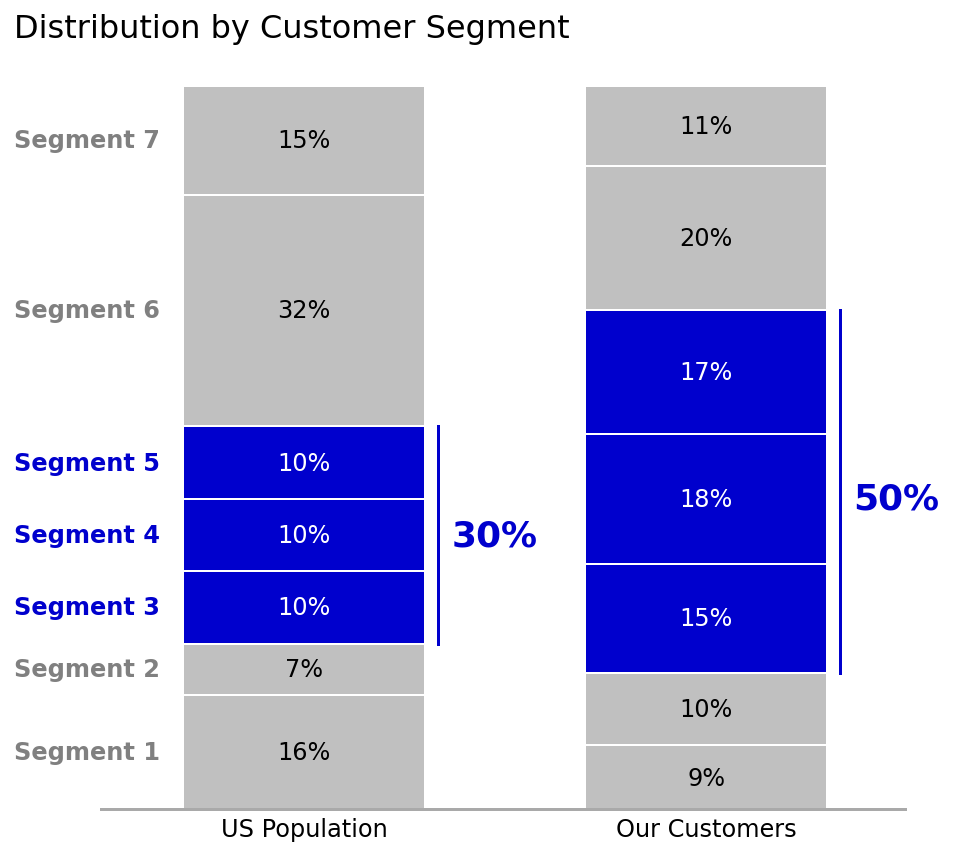

In [5]:
fig, ax = plt.subplots(figsize = (8, 7))

ax.set_xlim(-.33, 3)
ax.set_xticks([.75, 2.25])
ax.set_xticklabels(["US Population", "Our Customers"], fontsize = 12)

ax.set_ylim(0, 105)
ax.set_yticks([])

ax.set_title("Distribution by Customer Segment", loc = "left", fontsize = 16)

highlight = np.array([3, 4, 5])
bars(ax, distn_data, "US Population", highlight, 0.75, True)
bars(ax, distn_data, "Our Customers", highlight, 2.25, False)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)


ax.tick_params(axis=u'both', which=u'both',length=0)
ax.plot([0, 3], [0, 0], linewidth = 3, c = "darkgrey")

plt.show()

## Problem 3

In [6]:
brazil_death = pd.read_csv("brazil_excess_deaths.csv")
brazil_death.head()

,country,region,region_code,start_date,end_date,year,month,population,total_deaths,covid_deaths,...,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change,total_deaths_per_7_days,covid_deaths_per_7_days,expected_deaths_per_7_days,excess_deaths_per_7_days,non_covid_deaths_per_7_days,covid_deaths_per_100k_per_7_days,excess_deaths_per_100k_per_7_days
0,Brazil,Recife,26,2020-01-01,2020-01-31,2020,1,1645727,1334,0,...,0.000000,19.125286,0.308805,301.225806,0.000000,230.153226,71.072581,301.225806,0.000000,4.318613
1,Brazil,Recife,26,2020-02-01,2020-02-29,2020,2,1645727,1244,1,...,0.060763,17.591010,0.303300,300.275862,0.241379,230.396552,69.879310,300.034483,0.014667,4.246106
2,Brazil,Recife,26,2020-03-01,2020-03-31,2020,3,1645727,1386,7,...,0.425344,19.216431,0.295630,313.388964,1.582773,241.881561,71.507402,311.806191,0.096175,4.345034
3,Brazil,Recife,26,2020-04-01,2020-04-30,2020,4,1645727,1815,238,...,14.461694,50.524783,0.845450,423.500000,55.533333,229.483333,194.016667,367.966667,3.374395,11.789116
4,Brazil,Recife,26,2020-05-01,2020-05-31,2020,5,1645727,2979,897,...,54.504787,119.552028,1.945131,672.677419,202.548387,228.403226,444.274194,470.129032,12.307533,26.995619


In [7]:
list(brazil_death.columns)

['country',
 'region',
 'region_code',
 'start_date',
 'end_date',
 'year',
 'month',
 'population',
 'total_deaths',
 'covid_deaths',
 'expected_deaths',
 'excess_deaths',
 'non_covid_deaths',
 'covid_deaths_per_100k',
 'excess_deaths_per_100k',
 'excess_deaths_pct_change',
 'total_deaths_per_7_days',
 'covid_deaths_per_7_days',
 'expected_deaths_per_7_days',
 'excess_deaths_per_7_days',
 'non_covid_deaths_per_7_days',
 'covid_deaths_per_100k_per_7_days',
 'excess_deaths_per_100k_per_7_days']

In [8]:
month = ["January", "February", "March", "April", "May", "June", "July"]
brazil_death["percent_excess_deaths"] = brazil_death["excess_deaths"] / brazil_death["expected_deaths"] * 100 + 0.5
brazil_death["percent_excess_deaths"] = brazil_death["percent_excess_deaths"].astype(int)
brazil_death["month"] = [month[int(row["start_date"][6]) - 1] for i, row in brazil_death.iterrows()]
brazil_death = brazil_death[["country", "region", "month", "percent_excess_deaths"]]
brazil_death.head()

,country,region,month,percent_excess_deaths
0,Brazil,Recife,January,31
1,Brazil,Recife,February,30
2,Brazil,Recife,March,30
3,Brazil,Recife,April,85
4,Brazil,Recife,May,195


In [9]:
colors = ["#ffffd4", "#fee391", "#fec44f", "#fe9929", "#d95f0e", "#993404"]
bounds = [1, 2, 3, 4, 5, 6, 7]
boundaries = ["", "0", "+25", "+50", "+100", "+200", ""]
cols_per_row = np.array([])
for i, row in brazil_death.iterrows(): 
    col = "percent_excess_deaths"
    if row[col] <= 0: 
        cols_per_row = np.append(cols_per_row, "#ffffd4")
    elif row[col] <= 25: 
        cols_per_row = np.append(cols_per_row, "#fee391")
    elif row[col] <= 50: 
        cols_per_row = np.append(cols_per_row, "#fec44f")
    elif row[col] <= 100: 
        cols_per_row = np.append(cols_per_row, "#fe9929")
    elif row[col] <= 200: 
        cols_per_row = np.append(cols_per_row, "#d95f0e")
    else: 
        cols_per_row = np.append(cols_per_row, "#993404")
brazil_death["colors"] = cols_per_row
brazil_death.head()

,country,region,month,percent_excess_deaths,colors
0,Brazil,Recife,January,31,#fec44f
1,Brazil,Recife,February,30,#fec44f
2,Brazil,Recife,March,30,#fec44f
3,Brazil,Recife,April,85,#fe9929
4,Brazil,Recife,May,195,#d95f0e


In [10]:
def horizbar(ax, region, ycoord): 
    reg = brazil_death[brazil_death["region"] == region]
    reg = reg.reset_index(drop = True)
    excess_deaths = reg["percent_excess_deaths"]
    n = 7
    for i in np.arange(len(excess_deaths)): 
        col = reg["colors"][len(reg["colors"]) - 1 - i]
        ax.barh(ycoord, n, facecolor = col, edgecolor = "white")
        ax.text(-1, ycoord, region, horizontalalignment = 'left', verticalalignment = 'center')
        n -= 1

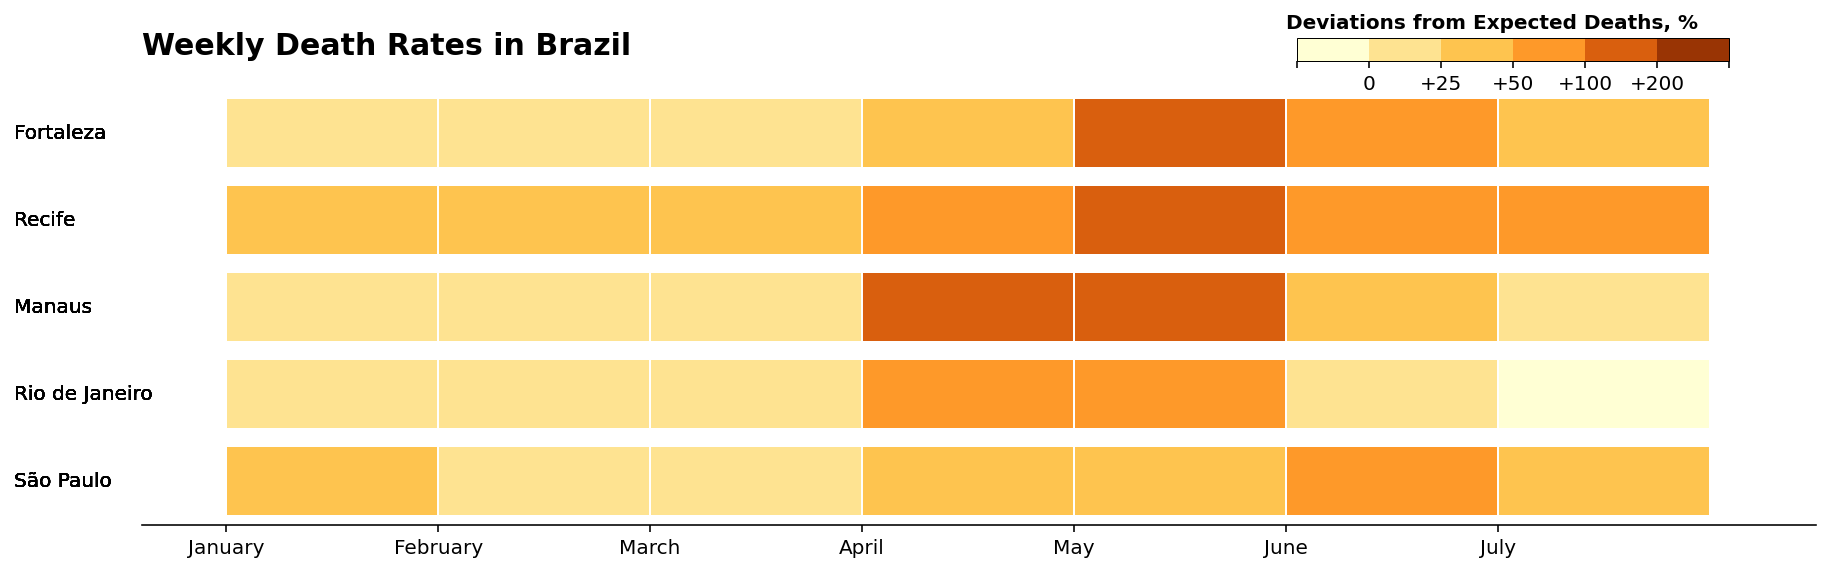

In [11]:
fig, ax = plt.subplots(figsize = (15, 4))

ax.set_ylim(-.5, 4.5)
ax.set_yticks([])

ax.set_xlim(-0.4, 7.5)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax.set_xticklabels(["January", "February", "March", "April", "May", "June", "July"])

ax.text(-0.4, 5, "Weekly Death Rates in Brazil", fontweight = "bold", 
        horizontalalignment = "left", verticalalignment = "center", fontsize = 15)

horizbar(ax, "Fortaleza", 4)
horizbar(ax, "Recife", 3)
horizbar(ax, "Manaus", 2)
horizbar(ax, "Rio de Janeiro", 1)
horizbar(ax, "São Paulo", 0)

ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)


ax_c = fig.add_axes([0.66, 0.93, 0.2, 0.04])
cmap = mpl.colors.ListedColormap(colors)

cb2 = ColorbarBase(ax_c, cmap = cmap, boundaries = bounds, ticks = bounds, 
                  label = boundaries, orientation = "horizontal")

cb2.outline.set_linewidth(.5)
ax.text(5, 5.2, "Deviations from Expected Deaths, %", fontweight = "bold")
cb2.set_label("")
cb2.set_ticklabels(boundaries)

plt.show()


## Problem 2

In [12]:
mortality = pd.read_csv("life-expectancy.csv")

In [13]:
mortality.head()

,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350


In [14]:
mortality[mortality["Year"] == 2019]

,Entity,Code,Year,Life expectancy
69,Afghanistan,AFG,2019,64.833
141,Africa,NaN,2019,63.170
211,Albania,ALB,2019,78.573
284,Algeria,DZA,2019,76.880
354,American Samoa,ASM,2019,73.745
...,...,...,...,...
18740,Western Sahara,ESH,2019,70.263
18817,World,OWID_WRL,2019,72.584
18887,Yemen,YEM,2019,66.125
18957,Zambia,ZMB,2019,63.886


In [17]:
def plot(ax, country, color): 
    df = mortality[mortality["Entity"] == country]
    ax.plot(df["Year"], df["Life expectancy"], label = country, color = color)

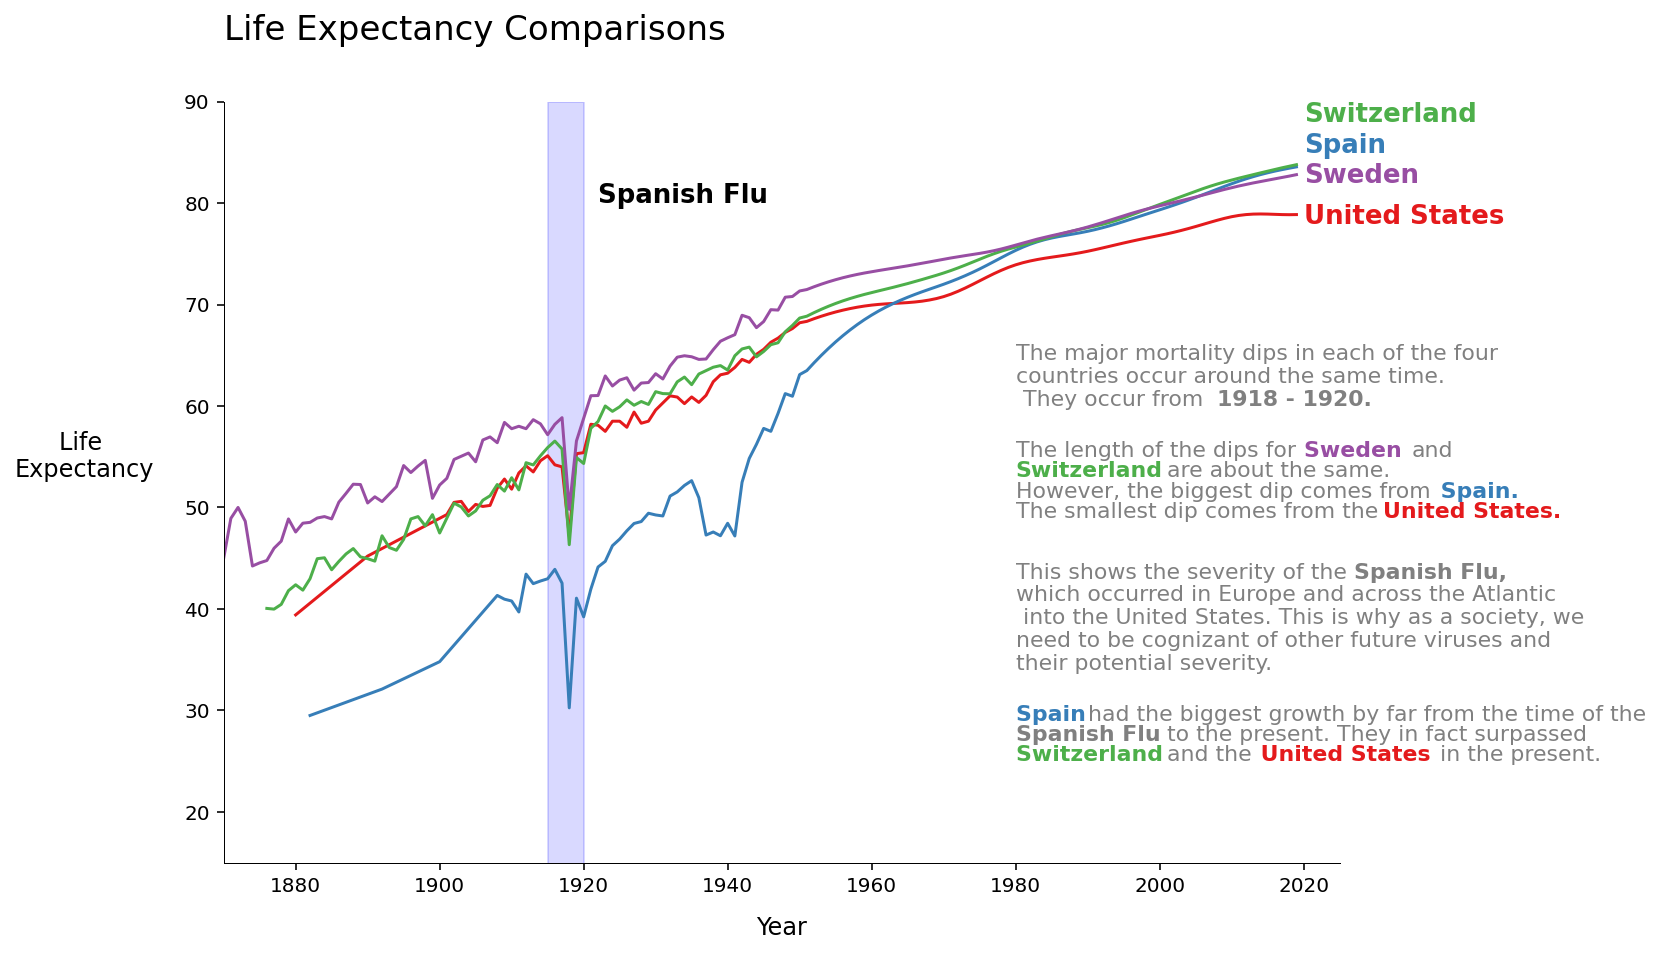

In [166]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.set_xlim(1870, 2025)
ax.set_ylim(15, 90)

plot(ax, "United States", "#e41a1c")
plot(ax, "Spain", "#377eb8")
plot(ax, "Switzerland", "#4daf4a")
plot(ax, "Sweden", "#984ea3")

#Labels
ax.text(2020, 88, "Switzerland", color = "#4daf4a", fontweight = "bold", fontsize = 13)
ax.text(2020, 85, "Spain", color = "#377eb8", fontweight = "bold", fontsize = 13)
ax.text(2020, 82, "Sweden", color = "#984ea3", fontweight = "bold", fontsize = 13)
ax.text(2020, 78, "United States", color = "#e41a1c", fontweight = "bold", fontsize = 13)

#Text
ax.text(1980, 60, 
        "The major mortality dips in each of the four \ncountries occur around the same time.\n They occur from ", 
       color = "grey", fontsize = 11)
ax.text(2008, 60, "1918 - 1920.", color = "grey", fontweight = "bold", fontsize = 11)

ax.text(1980, 55, 
       "The length of the dips for ", fontsize = 11, color = "grey")
ax.text(2020, 55, 
       "Sweden ", fontsize = 11, color = "#984ea3", fontweight = "bold")
ax.text(2035, 55, "and", fontsize = 11, color = "grey")
ax.text(1980, 53, "Switzerland", fontsize = 11, color = "#4daf4a", fontweight = "bold")
ax.text(2000, 53, " are about the same.", fontsize = 11, color = "grey")
ax.text(1980, 51, "However, the biggest dip comes from", color = "grey", fontsize = 11)
ax.text(2038, 51, " Spain.", color = "#377eb8", fontsize = 11, fontweight = "bold")
ax.text(1980, 49, "The smallest dip comes from the ", color = "grey", fontsize = 11)
ax.text(2031, 49, "United States. ", color = "#e41a1c", fontsize = 11, fontweight = "bold")

ax.text(1980, 43, "This shows the severity of the ", color = "grey", fontsize = 11)
ax.text(2027, 43, "Spanish Flu,", color = "grey", fontweight = "bold", fontsize = 11)
ax.text(1980, 34, "which occurred in Europe and across the Atlantic \n into the United States. This is why as a society, we \nneed to be cognizant of other future viruses and \ntheir potential severity.", 
        color = "grey", fontsize = 11)

ax.text(1980, 29, "Spain ", fontsize = 11, color = "#377eb8", fontweight = "bold")
ax.text(1990, 29, "had the biggest growth by far from the time of the ", color = "grey", fontsize = 11)
ax.text(1980, 27, "Spanish Flu", fontweight = "bold", color = "grey", fontsize = 11)
ax.text(2000, 27, " to the present. They in fact surpassed ", color = "grey", fontsize = 11)
ax.text(1980, 25, "Switzerland ", color = "#4daf4a", fontsize = 11, fontweight = "bold")
ax.text(2001, 25, "and the", color = "grey", fontsize = 11)
ax.text(2013, 25, " United States ", color = "#e41a1c", fontweight = "bold", fontsize = 11)
ax.text(2039, 25, "in the present.", color = "grey", fontsize = 11)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(.5)
ax.spines["bottom"].set_linewidth(.5)

ax.text(1870, 97, "Life Expectancy Comparisons", fontsize = 17, horizontalalignment = 'left', 
       verticalalignment = 'center')
ax.set_ylabel("Life \nExpectancy", labelpad = 50, fontsize = 10, rotation = 0, size = 12)
ax.set_xlabel("Year", labelpad = 10, fontsize = 10, size = 12)

ax.text(1922, 80, "Spanish Flu", fontweight = "bold", fontsize = 13)

plt.fill_between([1915, 1920], [90, 90], 0,
                 facecolor="blue", # The fill color
                 color='blue',       # The outline color
                 alpha=0.15)

plt.show()